In [1]:
import numpy as np
%run alg_genning.ipynb

Support algs imported!
Cube initiated
Gripbased alg genning initiated


In [2]:
with open('move_transition_table.txt', 'r') as f:
    lines = f.readlines()
    lines = lines[1:] # skip the first line

# split each line by tab
transition_table = np.array([list(map(int, line.split('\t'))) for line in lines if line.strip() and not line.startswith('#')])
transition_table = np.vstack((np.zeros(transition_table.shape[1]), transition_table))
transition_table = transition_table.astype(int)

In [3]:
transition_table = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	# Start (homegrip)
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

In [5]:
transition_table = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	# Start (homegrip)
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 2, 0, 3, 1, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # <>
    [ 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], # <R>
    [ 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # <R'
])

In [4]:
# idea: set up generic solver to solve xcross in DBL

state_xcross = np.array([0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,3,3,0,3,3,0,0,0,4,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,6,0,6,6,6,6,6,0])

search_depth = 2
table_depth = 4
# moves                   R  R2 R' L  L2 L' r  r2 r' l  l2 l' M  M2 M' U  U2 U' D  D2 D' u  u2 u' d  d2 d' E  E2 E' F  F2 F' B  B2 B' f  f2 f' b  b2 b' S  S2 S'
# allowed_moves = np.array([10,10,10,10,10,10, 0, 0, 0, 0, 0, 0, 0, 0, 0,10,10,10,10,10,10, 0, 0, 0, 0, 0, 0, 0, 0, 0,10,10,10,10,10,10, 0, 0, 0, 0, 0, 0, 0, 0, 0])
allowed_moves = np.full(45,10,dtype=int)

search_algs, table = generic_solver_setup(state_xcross, search_depth, table_depth, transition_table, allowed_moves=allowed_moves, start_grips = np.array([1]))

Genning search algs...
Algs of length 1 genned. Time spent: 1.90s...
Algs of length 2 genned. Time spent: 1.90s...
Algs of length 3 genned. Time spent: 1.90s...
Algs of length 4 genned. Time spent: 1.91s...
Done genning algs. Making into np array. Time spent: 1.91s
Genning table based on 46750 algs...
4675 (10.00%) algs added in 0.24 seconds...
9350 (20.00%) algs added in 0.30 seconds...
14025 (30.00%) algs added in 0.37 seconds...
18700 (40.00%) algs added in 0.43 seconds...
23375 (50.00%) algs added in 0.50 seconds...
28050 (60.00%) algs added in 0.56 seconds...
32725 (70.00%) algs added in 0.63 seconds...
37400 (80.00%) algs added in 0.69 seconds...
42075 (90.00%) algs added in 0.77 seconds...
Table generated in 0.83 seconds. Size: 23673 consisting of 46749 algs
Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Done genning algs. Making into np array. Time spent: 0.00s


In [5]:
def find_xcross(scramble, search_algs, table, rotate = True):
    # hold your cross color down. 
    # we can find xcross in DBL, so we need to convert the scramble so we can search for it in DFL, DBR, and DFR
    best_solve = None
    best_length = 100
    for rot in ["","y","y2","y'"] if rotate else [""]:
        rot_scramble = (rot + " " + scramble + " " + inverse_alg(rot)).strip()
        solve = generic_solver(rot_scramble, state_xcross, search_algs, table, string_alg = False)
        if solve is None:
            continue
        length = len(solve)
        if length < best_length:
            best_length = length
            best_solve = (inverse_alg(rot) + " " + array_to_alg(solve)).strip()
    return best_solve, best_length

scramble = "B F' L' F2 U2 L2 R' B2 L F' R2 D R U2 L U2 D L B2 R2"
find_xcross(scramble, search_algs, table, rotate = True)

("L' U2 R2 B' F'", 5)

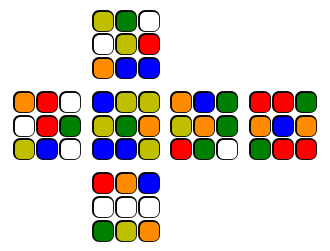

B R2 L' U D R' L B' D' R2 D' U2 B L B F' R2 L' D U2


In [18]:
def get_n_move_scramble(n):
    # assumes you have search_algs and table already set up such that the total length is n
    
    while True:
        scramble = gen_random_alg(20)
        solve, length = find_xcross(scramble, search_algs, table)
        if solve is None:
            continue
        if length == n:
            return scramble, solve, length
        
scramble, solve, length = get_n_move_scramble(5)
c = Cube(np.array([1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5]))
c.apply_moves(scramble)
c.plot()
print(scramble)

In [17]:
print(f"{solve} ({length} moves)")

y D F L2 R' B (5 moves)


# CPFB Finder

In [11]:
transition_table_CPFB = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	# Start (homegrip)
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
])

In [125]:
state_FB = np.array([0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,6,0,0,6,0,0,6,0,0])

search_depth = 2
table_depth = 3
# moves                   R  R2 R' L  L2 L' r  r2 r' l  l2 l' M  M2 M' U  U2 U' D  D2 D' u  u2 u' d  d2 d' E  E2 E' F  F2 F' B  B2 B' f  f2 f' b  b2 b' S  S2 S'
allowed_moves = np.array([ 9, 9, 9, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 9, 9, 9])
allowed_moves = np.full(45,10,dtype=int)

search_algs_CPFB, table_CPFB = generic_solver_setup(state_FB, search_depth, table_depth, transition_table_CPFB, allowed_moves=allowed_moves, start_grips = np.array([1]))

Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Algs of length 3 genned. Time spent: 0.00s...
Done genning algs. Making into np array. Time spent: 0.00s
Genning table based on 5323 algs...
532 (9.99%) algs added in 0.01 seconds...
1064 (19.99%) algs added in 0.02 seconds...
1596 (29.98%) algs added in 0.03 seconds...
2128 (39.98%) algs added in 0.04 seconds...
2660 (49.97%) algs added in 0.05 seconds...
3192 (59.97%) algs added in 0.06 seconds...
3724 (69.96%) algs added in 0.07 seconds...
4256 (79.95%) algs added in 0.07 seconds...
4788 (89.95%) algs added in 0.08 seconds...
5320 (99.94%) algs added in 0.09 seconds...
Table generated in 0.09 seconds. Size: 1587 consisting of 5322 algs
Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Done genning algs. Making into np array. Time spent: 0.00s


In [136]:
def get_n_move_CPFB(n, scramble_length=20, search_algs_CPFB=search_algs_CPFB, table_CPFB=table_CPFB, one_F=False):
    # assumes you have search_algs and table already set up such that the total length is n
    
    while True:
        scramble = transition_scrambler(scramble_length, transition_table_CPFB)
        scramble = array_to_alg(scramble)
        solve = generic_solver(scramble, state_FB, search_algs_CPFB, table_CPFB, string_alg = False, solve_CP = True)
        if solve is None:
            continue
        if one_F:
            # check if there are more than 1 F/f moves in the solution:
            s = array_to_alg(solve)
            Fs = s.count("F") + s.count("f")
            if Fs > 1:
                continue
        length = len(solve)
        if length == n:
            return scramble, array_to_alg(solve), length
        
scramble, solve, length = get_n_move_CPFB(n=5, scramble_length=18, one_F=True)
print(scramble)

F' R' S2 f' r F2 U2 f' F U2 F2 u2 F' R2 f2 r2 F' r2


In [137]:
print(f"{solve} ({length} moves)")

r F' R2 u S' (5 moves)
